In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('projectData/cancer_classification.csv')

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000,12.450000,18.250000,13.710000,13.000000,12.460000,...,11.510000,14.050000,11.200000,15.220000,20.920000,21.560000,20.130000,16.600000,20.600000,7.760000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000,15.700000,19.980000,20.830000,21.820000,24.040000,...,23.930000,27.150000,29.370000,30.620000,25.090000,22.390000,28.250000,28.080000,29.330000,24.540000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000,82.570000,119.600000,90.200000,87.500000,83.970000,...,74.520000,91.380000,70.670000,103.400000,143.000000,142.000000,131.200000,108.300000,140.100000,47.920000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000,477.100000,1040.000000,577.900000,519.800000,475.900000,...,403.500000,600.400000,386.000000,716.900000,1347.000000,1479.000000,1261.000000,858.100000,1265.000000,181.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300,0.127800,0.094630,0.118900,0.127300,0.118600,...,0.092610,0.099290,0.074490,0.104800,0.109900,0.111000,0.097800,0.084550,0.117800,0.052630
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800,0.170000,0.109000,0.164500,0.193200,0.239600,...,0.102100,0.112600,0.035580,0.208700,0.223600,0.115900,0.103400,0.102300,0.277000,0.043620
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000,0.157800,0.112700,0.093660,0.185900,0.227300,...,0.111200,0.044620,0.000000,0.255000,0.317400,0.243900,0.144000,0.092510,0.351400,0.000000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300,0.080890,0.074000,0.059850,0.093530,0.085430,...,0.041050,0.043040,0.000000,0.094290,0.147400,0.138900,0.097910,0.053020,0.152000,0.000000
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900,0.208700,0.179400,0.219600,0.235000,0.203000,...,0.138800,0.153700,0.106000,0.212800,0.214900,0.172600,0.175200,0.159000,0.239700,0.158700
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830,0.076130,0.057420,0.074510,0.073890,0.082430,...,0.065700,0.061710,0.055020,0.071520,0.068790,0.056230,0.055330,0.056480,0.070160,0.058840


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

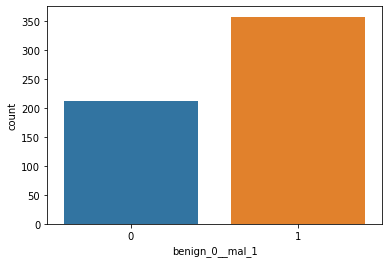

In [10]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

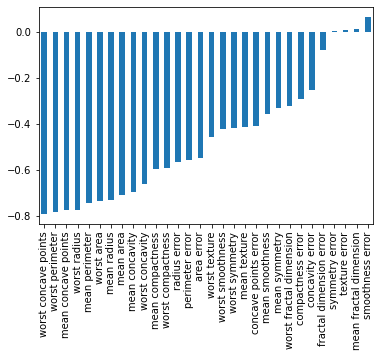

In [20]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

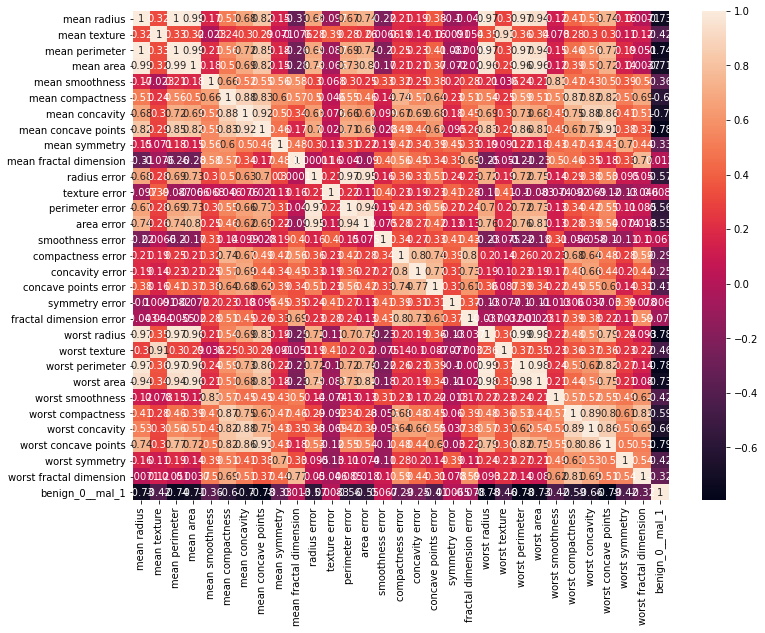

In [25]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True)

In [27]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [44]:
scaled = MinMaxScaler()

In [45]:
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [47]:
model = Sequential()
model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [48]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6761 - val_loss: 0.6465
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6348 - val_loss: 0.6092
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6083 - val_loss: 0.5737
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5728 - val_loss: 0.5371
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5366 - val_loss: 0.4967
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5000 - val_loss: 0.4573
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4625 - val_loss: 0.4168
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4185 - val_loss: 0.3758
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3755 - val_loss: 0.3387
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3557 - val_loss: 0.3091
Epoch 11/

Epoch 83/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0408 - val_loss: 0.0997
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.1069
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0569 - val_loss: 0.1037
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0504 - val_loss: 0.1049
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0558 - val_loss: 0.1036
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0534 - val_loss: 0.0999
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0550 - val_loss: 0.1061
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.1032
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0350 - val_loss: 0.1067
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0437 - val_loss: 0.1015


14/14 [==============================] - 0s 2ms/step - loss: 0.0372 - val_loss: 0.1080
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0397 - val_loss: 0.1127
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0333 - val_loss: 0.1156
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0345 - val_loss: 0.1101
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0419 - val_loss: 0.1166
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0445 - val_loss: 0.1100
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0337 - val_loss: 0.1136
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0423 - val_loss: 0.1080
Epoch 172/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0247 - val_loss: 0.1168
Epoch 173/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0311 - val_loss: 0.1141
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0200 - val_loss: 0.1267
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0231 - val_loss: 0.1195
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0219 - val_loss: 0.1379
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0217 - val_loss: 0.1150
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0216 - val_loss: 0.1279
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0215 - val_loss: 0.1177
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0247 - val_loss: 0.1520
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0273 - val_loss: 0.1154
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0226 - val_loss: 0.1271
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0188 - val_loss: 0.1243
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0149 - val_loss: 0.1313
Epoch 327/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0154 - val_loss: 0.1422
Epoch 328/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0259 - val_loss: 0.1202
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0193 - val_loss: 0.1653
Epoch 330/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0133 - val_loss: 0.1273
Epoch 331/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0154 - val_loss: 0.1347
Epoch 332/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0147 - val_loss: 0.1509
Epoch 333/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0204 - val_loss: 0.1256
Epoch 334/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0288 - val_loss: 0.1569
Epoch 335/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0172 - val_loss: 0.1309
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.1880
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0155 - val_loss: 0.1681
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.1646
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.1682
Epoch 411/600
14/14 [==============================] - ETA: 0s - loss: 0.008 - 0s 2ms/step - loss: 0.0132 - val_loss: 0.1506
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0185 - val_loss: 0.1991
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.1523
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.2031
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0116 - val_loss: 0.1573
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0086

14/14 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.1654
Epoch 489/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0100 - val_loss: 0.2131
Epoch 490/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.2097
Epoch 491/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.1884
Epoch 492/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.1808
Epoch 493/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.2673
Epoch 494/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0169 - val_loss: 0.1665
Epoch 495/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0112 - val_loss: 0.1844
Epoch 496/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.2382
Epoch 497/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.1590
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.2358
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.2070
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.2556
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.2203
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.2245
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.2590
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.2000
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.1963
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.2577
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.2397
Epoc

In [49]:
lossed = pd.DataFrame(model.history.history)

<AxesSubplot:>

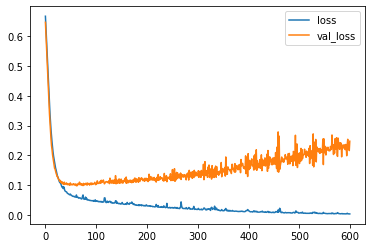

In [50]:
lossed.plot()

In [52]:
model = Sequential()
model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [55]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6648 - val_loss: 0.6363
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6342 - val_loss: 0.6058
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5920 - val_loss: 0.5692
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5550 - val_loss: 0.5294
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5094 - val_loss: 0.4840
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4674 - val_loss: 0.4333
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4258 - val_loss: 0.3865
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3718 - val_loss: 0.3443
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3581 - val_loss: 0.3091
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3191 - val_loss: 0.2788
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0738 - val_loss: 0.1119
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.1094
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0435 - val_loss: 0.1251
Epoch 00085: early stopping


<AxesSubplot:>

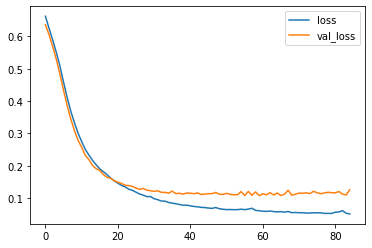

In [57]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [58]:
model = Sequential()
model.add(Dense(30,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation = 'relu'))
model.add(Dropout(0.5))

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [59]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 10ms/step - loss: 0.6919 - val_loss: 0.6759
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6910 - val_loss: 0.6641
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6820 - val_loss: 0.6526
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6720 - val_loss: 0.6372
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6414 - val_loss: 0.6172
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6324 - val_loss: 0.5874
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5967 - val_loss: 0.5580
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5856 - val_loss: 0.5272
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5395 - val_loss: 0.4928
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5196 - val_loss: 0.4648
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1343 - val_loss: 0.1061
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0893 - val_loss: 0.1210
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1462 - val_loss: 0.1072
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1145 - val_loss: 0.1117
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1570 - val_loss: 0.1110
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0953 - val_loss: 0.1079
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0888 - val_loss: 0.1043
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1368 - val_loss: 0.1175
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0897 - val_loss: 0.1091
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0922 - val_loss: 0.1022


In [60]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

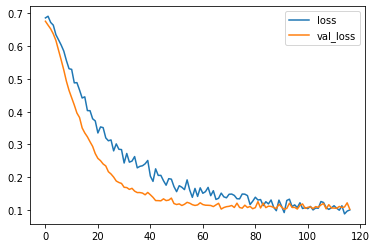

In [61]:
model_loss.plot()

In [66]:
predictions = model.predict_classes(X_test)

In [68]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [70]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]


In [71]:
print(accuracy_score(y_test,predictions))

0.9790209790209791
